In [18]:
import pandas as pd
import joblib

In [19]:
data=pd.read_csv("data_restaurantes_definitivo.csv", sep=";")
ciudades_escogidas=["barcelona","madrid","malaga","alicante","valencia","islas baleares","sevilla"]
# Provincias con más restaurantes
#Nos quedamos con las ciudades que queremos en data
data=data[data["Provincia"].isin(ciudades_escogidas)]

In [20]:
data.drop(columns=["Unnamed: 0","Michelin","Slug","Country","ZipCode","Street","comunidad_autonoma","Locality","Longitude","Latitude","Name","Rate_Distinction","Reservas_today"], inplace=True)

In [37]:
# Eliminamos las columnas innecesarias
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5640 entries, 0 to 7607
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Bookable                   5640 non-null   bool   
 1   Cantidad_metodos_pago      5640 non-null   int64  
 2   Reservas_last_week         5640 non-null   int64  
 3   Numero_fotos               5640 non-null   int64  
 4   Is_Affiliated              5640 non-null   bool   
 5   Average_Price              5640 non-null   float64
 6   Numero_awards              5640 non-null   int64  
 7   Review_count               5639 non-null   float64
 8   Rating_count               5639 non-null   float64
 9   Food_rating                5115 non-null   float64
 10  Service_rating             5115 non-null   float64
 11  Ambience_rating            5115 non-null   float64
 12  Tipo_comida                5640 non-null   object 
 13  Provincia                  5640 non-null   objec

In [39]:
data.head()

,Bookable,Cantidad_metodos_pago,Reservas_last_week,Numero_fotos,Is_Affiliated,Average_Price,Numero_awards,Review_count,Rating_count,Food_rating,Service_rating,Ambience_rating,Tipo_comida,Provincia,Poblacion,Salario Medio Anual,Michelin numérico,Rate_Distinction_numérico
0,True,5,32,17,True,125.0,1,255.0,479.0,9.7,9.9,9.5,Colombian,madrid,6751251,26721,1,3.0
1,True,7,115,14,True,23.0,0,3318.0,7977.0,9.3,9.5,9.3,Fusion,madrid,6751251,26721,0,3.0
2,True,3,57,8,True,30.0,0,24.0,99.0,9.0,9.3,9.1,Asian,madrid,6751251,26721,0,3.0
3,True,6,140,11,True,55.0,0,824.0,2590.0,9.6,9.3,9.4,Asian,madrid,6751251,26721,0,3.0
4,True,7,234,14,True,25.0,0,907.0,3047.0,9.1,9.3,9.2,Mexican,madrid,6751251,26721,0,3.0


In [44]:
modelo_cargado=joblib.load("random_forest_model.pkl")

dic_sal_pob={"madrid":[26721,6751251],"barcelona":[24243,5714730],"valencia":[20069,2589312],"sevilla":[17710,1947852],"malaga":[17390,1695651],"alicante":[17139,1881762],"islas baleares":[19834,1173008]}
data_to_predict={"Bookable": [True],"Cantidad_metodos_pago":[3],
            "Reservas_last_week":[34],"Numero_fotos":[34],"Is_Affiliated":[True],
            "Numero_awards":[2],"Review_count":[float(35)],"Rating_count":[float(355)],
            "Food_rating":[8.0],"Service_rating":[6.0],"Ambience_rating":[9.0],
            "Provincia":["madrid"],"Poblacion": [dic_sal_pob["madrid"][1]],"Salario Medio Anual": [dic_sal_pob["madrid"][0]],
            "Michelin numérico":[True],"Rate_Distinction_numérico":[1],"Tipo_comida":["Colombian"]}
data_to_predict_df = pd.DataFrame(data_to_predict)
#MICHELIN NUMERO

modelo_cargado.predict(data_to_predict_df)

array([62.33868651])

In [22]:
modelo_cargado.predict(data.head(4))

array([62.33868651, 28.20375281, 26.04446445, 26.04446445])

In [32]:
data_to_predict={"Sistema de reserva online": 0,"Cantidad métodos de pago":0,
            "Reservas última semana":0,"Número de fotos online":0,"Afiliado a The Fork":0,
            "Número de premios":0,"Número de comentarios":0,"Número de reseñas":0,
            "Calidad de comida":0,"Calidad del servicio":0,"Calidad del ambiente":0,
            "Provincia":0,"Población": 0,"Salario Medio Anual": 0,
            "Es Michelin":0,"Restaurante con distinción":0}

In [46]:
import sklearn
print(sklearn.__version__)

1.0.2


In [ ]:
            # data_to_predict={"Bookable": [True],"Cantidad_metodos_pago":[3],
            # "Reservas_last_week":[34],"Numero_fotos":[34],"Is_Affiliated":[True],
            # "Numero_awards":[2],"Review_count":[float(35)],"Rating_count":[float(355)],
            # "Food_rating":[8.0],"Service_rating":[6.0],"Ambience_rating":[9.0],
            # "Provincia":["madrid"],"Poblacion": [dic_sal_pob["madrid"][1]],"Salario Medio Anual": [dic_sal_pob["madrid"][0]],
            # "Michelin numérico":[True],"Rate_Distinction_numérico":[1],"Tipo_comida":["Colombian"]}

In [35]:
for i in data_to_predict.keys():
    if i not in data.columns:
        print(i)

Sistema de reserva online
Cantidad métodos de pago
Reservas última semana
Número de fotos online
Afiliado a The Fork
Número de premios
Número de comentarios
Número de reseñas
Calidad de comida
Calidad del servicio
Calidad del ambiente
Población
Es Michelin
Restaurante con distinción


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np
import joblib

df=data.copy()
# Suponiendo que tienes un DataFrame llamado df con tus datos
X = df.drop(columns=['Average_Price'])
y = df['Average_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define el preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), ['Tipo_comida', 'Provincia'])] #, 'Poblacion'
)

# Define el pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Entrena el modelo
pipeline.fit(X_train, y_train)

# Evalúa el modelo
mse = pipeline.score(X_test, y_test)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

joblib.dump(pipeline, 'random_forest_model.pkl')

Mean Squared Error: 0.08285266201629382
Root Mean Squared Error: 0.2878413834324276


['random_forest_model.pkl']

In [31]:
data.columns

Index(['Bookable', 'Cantidad_metodos_pago', 'Reservas_last_week',
       'Numero_fotos', 'Is_Affiliated', 'Average_Price', 'Numero_awards',
       'Review_count', 'Rating_count', 'Food_rating', 'Service_rating',
       'Ambience_rating', 'Tipo_comida', 'Provincia', 'Poblacion',
       'Salario Medio Anual', 'Michelin numérico',
       'Rate_Distinction_numérico'],
      dtype='object')

In [29]:
data.head()

,Bookable,Cantidad_metodos_pago,Reservas_last_week,Numero_fotos,Is_Affiliated,Average_Price,Numero_awards,Review_count,Rating_count,Food_rating,Service_rating,Ambience_rating,Tipo_comida,Provincia,Poblacion,Salario Medio Anual,Michelin numérico,Rate_Distinction_numérico
0,True,5,32,17,True,125.0,1,255.0,479.0,9.7,9.9,9.5,Colombian,madrid,6751251,26721,1,3.0
1,True,7,115,14,True,23.0,0,3318.0,7977.0,9.3,9.5,9.3,Fusion,madrid,6751251,26721,0,3.0
2,True,3,57,8,True,30.0,0,24.0,99.0,9.0,9.3,9.1,Asian,madrid,6751251,26721,0,3.0
3,True,6,140,11,True,55.0,0,824.0,2590.0,9.6,9.3,9.4,Asian,madrid,6751251,26721,0,3.0
4,True,7,234,14,True,25.0,0,907.0,3047.0,9.1,9.3,9.2,Mexican,madrid,6751251,26721,0,3.0


In [5]:
data[["Provincia","Salario Medio Anual","Poblacion"]].drop_duplicates()

,Provincia,Salario Medio Anual,Poblacion
0,madrid,26721,6751251
1567,barcelona,24243,5714730
2999,valencia,20069,2589312
3463,sevilla,17710,1947852
4005,malaga,17390,1695651
4449,alicante,17139,1881762
5019,islas baleares,19834,1173008


In [6]:
{"madrid":[26721,6751251],"barcelona":[24243,5714730],"valencia":[20069,2589312],"sevilla":[17710,1947852],"malaga":[17390,1695651],"alicante":[17139,1881762],"islas baleares":[19834,1173008]}

{'madrid': [26721, 6751251],
 'barcelona': [24243, 5714730],
 'valencia': [20069, 2589312],
 'sevilla': [17710, 1947852],
 'malaga': [17390, 1695651],
 'alicante': [17139, 1881762],
 'islas baleares': [19834, 1173008]}

"Sistema de reserva online"
"Cantidad métodos de pago"
"Reservas última semana"
"Número de fotos online"
"Afiliado a The Fork"
"Número de premios"
"Número de comentarios"
"Número de reseñas"
"Calidad de comida"
"Calidad del servicio"
"Calidad del ambiente"
"Tipo de comida"
"Provincia"
"Población"
"Salario Medio Anual"
"Es Michelin"
"Restaurante con distinción"

In [7]:
data["Rate_Distinction_numérico"].unique()

array([ 3.,  2.,  1., nan])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5640 entries, 0 to 7607
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Bookable                   5640 non-null   bool   
 1   Cantidad_metodos_pago      5640 non-null   int64  
 2   Reservas_last_week         5640 non-null   int64  
 3   Numero_fotos               5640 non-null   int64  
 4   Is_Affiliated              5640 non-null   bool   
 5   Average_Price              5640 non-null   float64
 6   Numero_awards              5640 non-null   int64  
 7   Review_count               5639 non-null   float64
 8   Rating_count               5639 non-null   float64
 9   Food_rating                5115 non-null   float64
 10  Service_rating             5115 non-null   float64
 11  Ambience_rating            5115 non-null   float64
 12  Tipo_comida                5640 non-null   object 
 13  Provincia                  5640 non-null   objec

Modelo 1

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np
import joblib

df=data.copy()
# Suponiendo que tienes un DataFrame llamado df con tus datos
X = df.drop(columns=['Average_Price'])
y = df['Average_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define el preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), ['Tipo_comida', 'Provincia'])] #, 'Poblacion'
)

# Define el pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Entrena el modelo
pipeline.fit(X_train, y_train)

# Evalúa el modelo
mse = pipeline.score(X_test, y_test)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

joblib.dump(pipeline, 'random_forest_model.pkl')

Mean Squared Error: 0.08285266201629382
Root Mean Squared Error: 0.2878413834324276


['random_forest_model.pkl']

In [15]:
data.head(1)

,Bookable,Cantidad_metodos_pago,Reservas_last_week,Numero_fotos,Is_Affiliated,Average_Price,Numero_awards,Review_count,Rating_count,Food_rating,Service_rating,Ambience_rating,Tipo_comida,Provincia,Poblacion,Salario Medio Anual,Michelin numérico,Rate_Distinction_numérico
0,True,5,32,17,True,125.0,1,255.0,479.0,9.7,9.9,9.5,Colombian,madrid,6751251,26721,1,3.0


Uso de validación cruzada para búsqueda de mejores parámetros

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import pandas as pd

df = data.copy()
# Suponiendo que tienes un DataFrame llamado df con tus datos
X = df.drop(columns=['Average_Price'])
y = df['Average_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define el preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), ['Tipo_comida', 'Provincia'])]
)

# Define el pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define la grid de hiperparámetros
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5, 10]
}

# Usar GridSearchCV para buscar los mejores hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluar el mejor modelo encontrado
best_model = grid_search.best_estimator_

# Predecir y calcular los errores
y_pred = best_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)

# print("Best Parameters:", grid_search.best_params_)
# print("Mean Squared Error:", mse)
# print("Root Mean Squared Error:", rmse)

from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np
import joblib

df=data.copy()
# Suponiendo que tienes un DataFrame llamado df con tus datos
X = df.drop(columns=['Average_Price'])
y = df['Average_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define el preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), ['Tipo_comida', 'Provincia'])] #, 'Poblacion'
)

# Define el pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Entrena el modelo
pipeline.fit(X_train, y_train)

# Evalúa el modelo
mse = pipeline.score(X_test, y_test)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)




NameError: name 'mse' is not defined

Mean Squared Error: 275.99472673165883
Root Mean Squared Error: 16.61308901835113


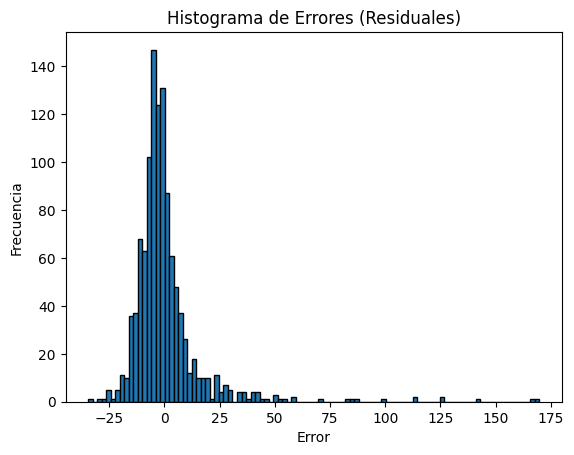

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Predecir los valores en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular los errores (residuales)
errors = y_test - y_pred

# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Crear un histograma de los errores
plt.hist(errors, bins=100, edgecolor='k')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Histograma de Errores (Residuales)')
plt.show()


In [53]:
pipeline.predict(X_test.head(5))

array([30.31575715, 19.37313154, 20.86924534, 21.02726384, 20.86287031])

In [74]:
data[data["Provincia"]=="madrid"]

,Bookable,Cantidad_metodos_pago,Reservas_today,Reservas_last_week,Numero_fotos,Is_Affiliated,Average_Price,Numero_awards,Review_count,Rating_count,Food_rating,Service_rating,Ambience_rating,Tipo_comida,Provincia,Poblacion,Salario Medio Anual,Michelin numérico,Rate_Distinction_numérico
0,True,5,0,32,17,True,125.0,1,255.0,479.0,9.7,9.9,9.5,Colombian,madrid,6751251,26721,1,3.0
1,True,7,0,115,14,True,23.0,0,3318.0,7977.0,9.3,9.5,9.3,Fusion,madrid,6751251,26721,0,3.0
2,True,3,7,57,8,True,30.0,0,24.0,99.0,9.0,9.3,9.1,Asian,madrid,6751251,26721,0,3.0
3,True,6,0,140,11,True,55.0,0,824.0,2590.0,9.6,9.3,9.4,Asian,madrid,6751251,26721,0,3.0
4,True,7,9,234,14,True,25.0,0,907.0,3047.0,9.1,9.3,9.2,Mexican,madrid,6751251,26721,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,True,3,0,3,13,True,155.0,1,31.0,73.0,9.5,9.4,8.9,Mediterranean,madrid,6751251,26721,1,3.0
7604,True,5,2,41,17,True,22.0,0,2633.0,6059.0,9.4,9.3,9.1,Indian,madrid,6751251,26721,0,3.0
7605,True,7,11,139,14,True,22.0,0,99.0,301.0,9.0,9.0,9.0,International,madrid,6751251,26721,0,3.0
7606,True,4,1,2,36,True,40.0,0,18.0,72.0,8.6,8.9,8.4,French,madrid,6751251,26721,0,2.0


In [93]:
data_to_predict = {
    'Bookable': [True],
    'Cantidad_metodos_pago': [100],
    'Reservas_today': [1],
    'Reservas_last_week': [8],
    'Numero_fotos': [22],
    'Is_Affiliated': [True],
    'Numero_awards': [0],
    'Review_count': [2.0],
    'Rating_count': [175.0],
    'Food_rating': [9.2],
    'Service_rating': [4.22],
    'Ambience_rating': [4.2],
    'Tipo_comida': ["Colombian"],
    'Provincia': ["madrid"],
    'Poblacion': [6751251],
    'Salario Medio Anual': [26721],
    'Michelin numérico': [0],
    'Rate_Distinction_numérico': [3.0]
}

# Convertir el diccionario a un DataFrame
data_to_predict_df = pd.DataFrame(data_to_predict)
pipeline.predict(data_to_predict_df)

array([61.02180556])

Modelo 2

In [116]:
from xgboost import XGBRegressor
from sklearn.preprocessing import OrdinalEncoder

df=data.copy()
X = df.drop(columns=['Average_Price'])
y = df['Average_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Define el preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ['Tipo_comida', 'Provincia'])]
)

# Define el pipeline
pipeline2 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor())
])

# Entrena el modelo
pipeline2.fit(X_train, y_train)

# Evalúa el modelo
mse = pipeline2.score(X_test, y_test)
print("Mean Squared Error:", mse)
# joblib.dump(pipeline2, 'xgboost_model.pkl')


Mean Squared Error: 0.06057160936732742


Mean Squared Error: 256.45527905737436
Root Mean Squared Error: 16.014221150507893


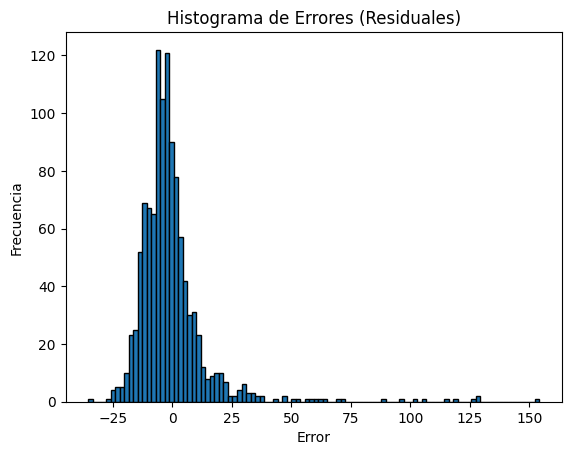

In [118]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Predecir los valores en el conjunto de prueba
y_pred = pipeline2.predict(X_test)

# Calcular los errores (residuales)
errors = y_test - y_pred

# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Crear un histograma de los errores
plt.hist(errors, bins=100, edgecolor='k')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Histograma de Errores (Residuales)')
plt.show()


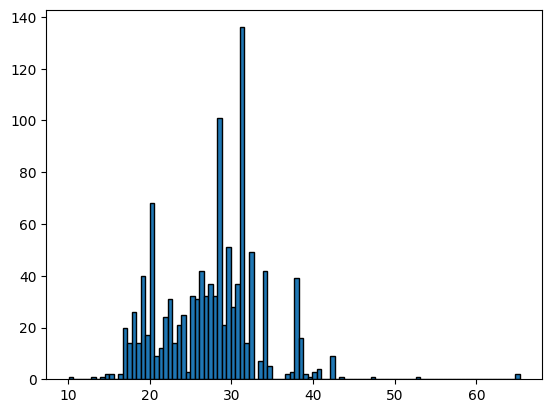

In [120]:
plt.hist(y_pred, bins=100, edgecolor='k')
plt.show()

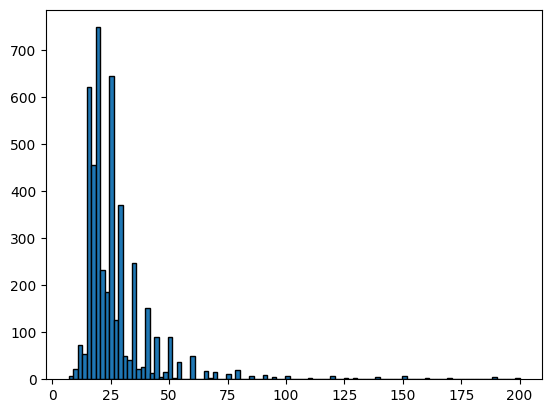

In [122]:
plt.hist(y_train, bins=100, edgecolor='k')
plt.show()